In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
%matplotlib inline
from scipy.interpolate import interp1d 
import fitsio, esutil
import scipy
#sys.path.append('../cosmolike_planck_working/')

%load_ext autoreload
%autoreload 2

HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)

In [3]:
import esutil

In [24]:
cmass_spec = esutil.io.read(['/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz',
                          '/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz'
                         ], combine=True)
zbins = np.linspace(0.0, 4.0, 401)
Nz_cmass,_ = np.histogram( cmass_spec['Z'], bins= zbins, normed=True)

DAT = np.column_stack((zbins[:-1], Nz_cmass))
np.savetxt('/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/cmass_full.nz',DAT, header='zbin_low, Nz')

reading 1/2 /n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_North.fits.gz
reading 2/2 /n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz


In [119]:
#theta, corrdata, correrr = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt', unpack=True)
#output files 
root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_sgc.nz_2'
twopt_dat = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename = twopt_dat+'.cov'
twopt_filename = twopt_dat+'.txt'
output_fitsname = root_dir +'/fits/datav_cov_dmass_spt_real.fits'

Hfactor = HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_dmass_spt_real.fits


In [120]:
root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_sgc.nz_2'
twopt_dat = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename = twopt_dat+'.cov'
twopt_filename = twopt_dat+'.txt'
output_fitsname = root_dir +'/fits/datav_cov_cmass_sgc_real.fits'


make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_cmass_sgc_real.fits


In [121]:
root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_full.nz'
twopt_dat = '../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100'
cov_filename = twopt_dat+'.cov'
twopt_filename = twopt_dat+'.txt'
output_fitsname = root_dir +'/fits/datav_cov_cmass_full_real.fits'


make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_cmass_full_real.fits


In [122]:
root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_ngc.nz_2'
twopt_dat = '../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100'
cov_filename = twopt_dat+'.cov'
twopt_filename = twopt_dat+'.txt'
output_fitsname = root_dir +'/fits/datav_cov_cmass_ngc_real.fits'


make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_cmass_ngc_real.fits


In [51]:
#Combining two


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_sgc.nz_2'

twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = twopt_dat1+'.cov'
twopt_filename1 = twopt_dat1+'.txt'

twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = twopt_dat2+'.cov'
twopt_filename2 = twopt_dat2+'.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,1] - np.genfromtxt(twopt_filename2)[:,1]
twopt_dat = root_dir+'residual_auto_dmass_cmass_sgc_nbin10_jk100'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_sgc_nbin10_jk100.fits'

Hfactor = HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[-0.00395873  0.00017522 -0.00108839 -0.00225138  0.00023325  0.00074542
  0.00032695  0.00187094  0.00063364 -0.00039429]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_sgc_nbin10_jk100.fits


In [48]:
#Combining two


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_full.nz'

twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = twopt_dat1+'.cov'
twopt_filename1 = twopt_dat1+'.txt'

twopt_dat2 = '../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = twopt_dat2+'.cov'
twopt_filename2 = twopt_dat2+'.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,1] - np.genfromtxt(twopt_filename2)[:,1]
twopt_dat = root_dir+'residual_auto_dmass_cmass_full_nbin10_jk100'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_full_nbin10_jk100.fits'

Hfactor = HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[-0.01613427 -0.00738069 -0.0090005  -0.00427666 -0.00252637 -0.00170858
  0.00060801  0.00314079  0.00117703 -0.00064465]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_full_nbin10_jk100.fits


In [18]:
cov_mocks = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov')
cov_mocks_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.cov')
cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_rescaled_mocks_NG.txt')
print cov_rescaled_mocks.shape

cov_cmass_n = cov_mocks_ngc.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
cov_cmass_s = cov_mocks.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_dmass = cov_rescaled_mocks.copy() #np.genfromtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.cov')
cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_COMBINED_N_QPM_1000_S_QPM_760.cov', cov_cmass_full)


#meanr_sgc, xi_sgc, _ = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cmass_sgc_filename = '../data_txt/cmass/npairs_cmass_sgc_veto_bins10_binslop_05.txt'
cmass_sgc_data = np.genfromtxt(cmass_sgc_filename)
rnom_sgc, meanr_sgc, meanlogR_sgc, xi_sgc, _, DD_sgc, RR_sgc, DR_sgc, npairs_sgc = [cmass_sgc_data[:,i] for i in range(9)]

#cov_cmass_s = cov_mocks.copy() #cov_an_cmass.copy()
#xi_err_sgc = np.sqrt(cov_cmass_s.diagonal())

cmass_ngc_filename = '../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt'
cmass_ngc_data1 = np.genfromtxt(cmass_ngc_filename)
rnom_ngc, _, _, xi_ngc, sigma_xi_ngc1, DD_ngc, RR_ngc, DR_ngc, npairs_ngc = [cmass_ngc_data1[:,i] for i in range(9)]
#cov_cmass_n = cov_mocks_ngc.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')* 1./HFactor
#xi_err_ngc = np.sqrt(cov_cmass_n.diagonal())

DD_full = DD_sgc + DD_ngc
DR_full = DR_sgc + DR_ngc
RR_full = RR_sgc + RR_ngc

#meanr_full = rnom_ngc.copy()
xi_full = (DD_full - 2*DR_full + RR_full)*1./RR_full
npairs_full = np.zeros(rnom_sgc.size)
DAT = np.column_stack((rnom_sgc, meanr_sgc, meanlogR_sgc, xi_full, 1./RR_full, DD_full, RR_full, DR_full,npairs_full))
np.savetxt('../data_txt/cmass/npairs_cmass_combined_ngc_sgc_bins10_binslop_05.txt', DAT)
#cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
#xi_err_full = np.sqrt(cov_cmass_full.diagonal())


dmass_data_filename = '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'
dmass_data = np.genfromtxt(dmass_data_filename)
#rnom_dmass, _, _, xi_dmass, _, _, _, _, _ = [dmass_data[:,i] for i in range(9)]
#cov_dmass = cov_rescaled_mocks.copy() #cov_an_dmass.copy()
#xi_err_dmass = np.sqrt(cov_dmass.diagonal())

(10, 10)


In [13]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_sgc.nz_2'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_sgc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '../data_txt/cmass/cov_rescaled_mocks_NG.txt'
twopt_filename2 =  '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_sgc_nbins10_covmocks'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_sgc_nbins10_covmocks.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 2.9500e-03 -1.6400e-03  1.4780e-03  1.2190e-03 -1.3000e-03 -1.1720e-03
 -4.4300e-04 -1.7764e-03 -9.8970e-04 -8.7400e-05]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_sgc_nbins10_covmocks.fits


In [15]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_ngc.nz_2'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '../data_txt/cmass/cov_rescaled_mocks_NG.txt'
twopt_filename2 =  '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_ngc_nbins10_covmocks'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_ngc_nbins10_covmocks.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 0.01653    0.01023    0.011319   0.006546   0.003693   0.000463
 -0.000912  -0.0024067 -0.001561   0.0003677]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_ngc_nbins10_covmocks.fits


In [19]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_full.nz'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_COMBINED_N_QPM_1000_S_QPM_760.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_combined_ngc_sgc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '../data_txt/cmass/cov_rescaled_mocks_NG.txt'
twopt_filename2 =  '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_full_nbins10_covmocks'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_full_nbins10_covmocks.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 0.01277694  0.0069337   0.00897411  0.00510915  0.00254888  0.00014651
 -0.00072967 -0.00215836 -0.00142687  0.00028348]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_full_nbins10_covmocks.fits


In [24]:
Nthetabin = 10
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from su_utils import read_cov, imshowplot

cov_an_cmass_sgc_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_cmass_sgc = read_cov( covfilename=cov_an_cmass_sgc_filename)[-10:, -10:]
np.savetxt('/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_reshape.cov', cov_an_cmass_sgc)

cov_an_cmass_ngc_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_cmass_ngc = read_cov( covfilename=cov_an_cmass_ngc_filename)[-10:, -10:]
np.savetxt('/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_reshape.cov', cov_an_cmass_ngc)

cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_dmass = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]

cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_an_cmass_sgc ) + np.linalg.inv( cov_an_cmass_ngc ))
#cov_an_cmass_full_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_full_veto_10bins_NG'
np.savetxt('/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_full_veto_10bins_NG_reshape.cov', cov_cmass_full)


In [25]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_sgc.nz_2'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_reshape.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_sgc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_reshape.cov'
twopt_filename2 = '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_sgc_nbins10_covanalytic'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_sgc_nbins10_covanalytic.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 2.9500e-03 -1.6400e-03  1.4780e-03  1.2190e-03 -1.3000e-03 -1.1720e-03
 -4.4300e-04 -1.7764e-03 -9.8970e-04 -8.7400e-05]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_sgc_nbins10_covanalytic.fits


In [26]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_ngc.nz_2'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_reshape.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_reshape.cov'
twopt_filename2 = '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_ngc_nbins10_covanalytic'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_ngc_nbins10_covanalytic.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 0.01653    0.01023    0.011319   0.006546   0.003693   0.000463
 -0.000912  -0.0024067 -0.001561   0.0003677]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_ngc_nbins10_covanalytic.fits


In [27]:
#New mock cov


root_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat/'
nzdist_filename = root_dir + './cmass_full.nz'

#twopt_dat1 = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'
cov_filename1 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_full_veto_10bins_NG_reshape.cov'
twopt_filename1 = '../data_txt/cmass/npairs_cmass_combined_ngc_sgc_bins10_binslop_05.txt'

#twopt_dat2 = '../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100'
cov_filename2 = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_reshape.cov'
twopt_filename2 = '../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt'

cov = np.genfromtxt(cov_filename1) + np.genfromtxt(cov_filename2)
bins = np.genfromtxt(twopt_filename2)[:,0]
datav = np.genfromtxt(twopt_filename1)[:,3] - np.genfromtxt(twopt_filename2)[:,3]
twopt_dat = root_dir+'residual_auto_dmass_cmass_full_nbins10_covanalytic'
cov_filename = twopt_dat + '.cov'
twopt_filename = twopt_dat + '.txt'

np.savetxt(cov_filename, cov)
np.savetxt(twopt_filename, np.column_stack((bins, datav, np.sqrt(cov.diagonal()))))

output_fitsname = root_dir+'/fits/datav_residual_auto_dmass_cmass_full_nbins10_covanalytic.fits'

Hfactor = 1.0 #HF(100,10)
make_fits( rootdir = root_dir, 
             nzdist_filename = nzdist_filename,
             twopt_filename = twopt_filename, 
             cov_filename = cov_filename, 
             output_fitsname=output_fitsname, Hartlap= Hfactor)

[ 0.01277694  0.0069337   0.00897411  0.00510915  0.00254888  0.00014651
 -0.00072967 -0.00215836 -0.00142687  0.00028348]
fits saved to  /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_full_nbins10_covanalytic.fits


In [14]:
import twopoint

cmass_sgc_fits = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_cmass_sgc_real.fits'
f_sgc = twopoint.TwoPointFile.from_fits(cmass_sgc_fits, covmat_name="COVMAT")
wtheta_cmass_sgc = f_sgc.get_spectrum('wtheta').value
err_sgc = f_sgc.covmat_info.get_error(name='wtheta') #* HFfactor


cmass_full_fits = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_cmass_full_real.fits'
f = twopoint.TwoPointFile.from_fits(cmass_full_fits, covmat_name="COVMAT")
wtheta_cmass_full = f.get_spectrum('wtheta').value
err_full = f.covmat_info.get_error(name='wtheta') #*HFfactor


dmass_spt_fits = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_cov_dmass_spt_real.fits'
f = twopoint.TwoPointFile.from_fits(dmass_spt_fits, covmat_name="COVMAT")
wtheta_dmass = f.get_spectrum('wtheta').value
err_dmass = f.covmat_info.get_error(name='wtheta') #*HFfactor

found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns
found no extra columns


In [27]:
f_sgc.covmat_info.name

'COVMAT'

In [43]:
rm /n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_full_nbin10_jk100.fits

In [52]:
dv_fits = '/n/des/lee.5922/programs/cosmolike/cosmosis/dmass_cat//fits/datav_residual_auto_dmass_cmass_sgc_nbin10_jk100.fits'
f = twopoint.TwoPointFile.from_fits(dv_fits, covmat_name="COVMAT")
wtheta_dv = f.get_spectrum('wtheta').value
err_dv = f.covmat_info.get_error(name='wtheta') #*HFfactor

found no extra columns
found no extra columns
found no extra columns
found no extra columns


In [46]:
wtheta_dv

array([0.18522238, 0.13297778, 0.09326339, 0.06738893, 0.04481562,
       0.02857895, 0.01690479, 0.01001901, 0.0043968 , 0.00112265])

In [11]:

"""
dmass_twopt_dat = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5//act/acf_auto_dmass_all_weight_pcut01_nbins10_jk100'



#DAT = np.loadtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.txt')
DAT = np.loadtxt(dmass_twopt_dat+'.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]

DAT7 = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt')
meanr7, xi7, xi_err7 = [DAT7[:,i] for i in range(3)]

DAT11 = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt')
meanr11, xi11, xi_err11 = [DAT11[:,i] for i in range(3)]



cov_cmass_n = np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_dmass = np.genfromtxt('../data_txt/acf_auto_dmass_spt_nbins10_jk100.cov')


HFn = HF(100, 10)
HFs = HF(100, 10)
HFd = HF(100, 10)

print HFn

F_ns = HFn * HFs * np.linalg.inv(cov_cmass_n + cov_cmass_s)
F_nd = HFn * HFd * np.linalg.inv(cov_cmass_n + cov_dmass)
F_sd = HFs * HFd * np.linalg.inv(cov_cmass_s + cov_dmass)

"""

0.888888888889


In [12]:
data_dir = '/n/des/lee.5922/programs/cosmolike/cosmosis/'
cosmosis_wtheta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/bin_1_1.txt')
cosmosis_theta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/theta.txt')* 57.2958
cosmosis_wtheta02 = np.genfromtxt(data_dir+'output/wgtheta_z0.2/galaxy_xi/bin_1_1.txt')
cosmosis_wthetam02 = np.genfromtxt(data_dir+'output/wgtheta_zm0.2/galaxy_xi/bin_1_1.txt')
#cosmosis_theta = np.genfromtxt(data_dir+'output/wgtheta/galaxy_xi/theta.txt')* 57.2958

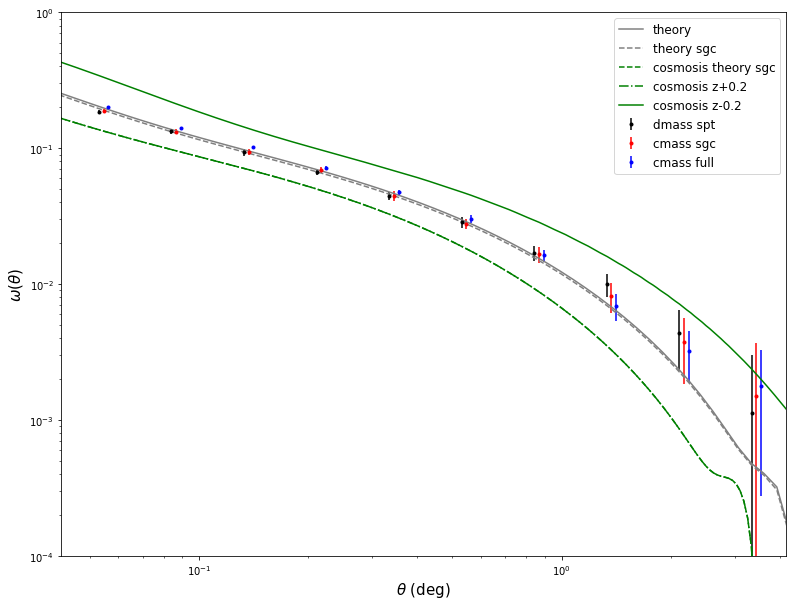

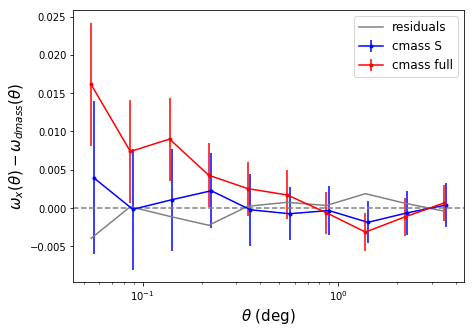

In [53]:

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)


theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)
cosmosis_interp = scipy.interpolate.interp1d(cosmosis_theta, cosmosis_wtheta)
cosmosis_interp = cosmosis_interp( meanr )
nzs_ratio = theory_sgc_interp/theory_interp

fig, ax = plt.subplots(figsize = (13, 10))

ax.errorbar(meanr*0.97, wtheta_dmass, yerr = err_dmass, fmt = '.', color='k', label='dmass spt')
ax.errorbar(meanr, wtheta_cmass_sgc, yerr = err_sgc, fmt = '.', color='r', label='cmass sgc')
ax.errorbar(meanr*1.03, wtheta_cmass_full, yerr = err_full, fmt = '.', color='b', label='cmass full')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')
ax.plot(cosmosis_theta, cosmosis_wtheta, '--', color='green', label='cosmosis theory sgc')
ax.plot(cosmosis_theta, cosmosis_wtheta02, '-.', color='green', label='cosmosis z+0.2')
ax.plot(cosmosis_theta, cosmosis_wthetam02, '-', color='green', label='cosmosis z-0.2')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)


#fig.savefig('../figure/acf_comparison_cmass_dmass.pdf')



fig, ax = plt.subplots(figsize = (7, 5))

#ax.errorbar(meanr*0.97, wtheta_dmass-wtheta_dmass, yerr = np.sqrt(2)*err_dmass, fmt = '.-', color='k')
ax.axhline(y = 0, ls='--', color = 'grey')
ax.errorbar(meanr*1.03, wtheta_cmass_sgc-wtheta_dmass, yerr = np.sqrt(err_sgc**2+err_dmass**2), fmt = '.-b', label='cmass S')
ax.errorbar(meanr*1.0, wtheta_cmass_full-wtheta_dmass, yerr = np.sqrt(err_dmass**2+err_full**2), fmt = '.-r', label='cmass full')

ax.plot(meanr, wtheta_dv, '-', color='grey',label='residuals' )
#ax.plot(meanr, theory_sgc_interp -xi, '--', color='grey', label='theory sgc' )
#ax.plot(meanr, cosmosis_interp -xi, '--', color='green', label='cosmosis theory sgc' )

#vdiff = xi - xi7
#chisqr = np.dot(np.dot( vdiff, F_ns), vdiff)#/vdiff.size

ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega_x(\theta)- \omega_{dmass}(\theta)$', fontsize = 15)





In [12]:
def make_fits( rootdir = None, 
             nzdist_filename = None,
             twopt_filename = None, 
             cov_filename = None, 
             output_fitsname = None, 
             Hartlap = 1.0 ) :
    
    from astropy.io import fits
    fitsname = '/n/des/lee.5922/programs/cosmolike/des-mpp/cosmosis/extensions/systematics/1neutrino/2pt_sim_1110_1neutrino_baseline.fits'
    #ffits = fitsio.FITS(fitsname)

    hdulist = fits.open(fitsname, mode='update')

    theta, corrdata, correrr = np.loadtxt(twopt_filename, unpack=True)
    print corrdata
    theta = 60 * theta
    cov = np.genfromtxt(cov_filename) * 1./np.sqrt(Hartlap)
    

    cov_empty = np.zeros((40,40))
    np.fill_diagonal(cov_empty, 1)
    cov_empty[-10:, -10:] = cov[:,:]

    hdulist[1].data = cov_empty[:,:]

    chdr = hdulist[1].header
    chdr.set("NAME_0", "xip")
    chdr.set("STRT_0", 0)
    chdr.set("NAME_1", "xim")
    chdr.set("STRT_1", 10)
    chdr.set("NAME_2", "gammat")
    chdr.set("STRT_2", 20)
    chdr.set("NAME_3", "wtheta")
    chdr.set("STRT_3", 30)




    ntheta = len(theta)
    ggl_bin1 = np.ones(ntheta)
    ggl_bin2 = np.ones(ntheta)
    ggl_angbin = np.arange(1, ntheta+1, 1)
    #ggl_value = corrdata[:ntheta].copy()
    #ggl_ang = theta[:ntheta].copy()
    ggl_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
    ggl_ang =  theta[:ntheta].copy()

    ggl_col1 = fits.Column(name='BIN1', format='i8', array=ggl_bin1)
    ggl_col2 = fits.Column(name='BIN2', format='i8', array=ggl_bin2)
    ggl_col3 = fits.Column(name='ANGBIN', format='i8', array=ggl_angbin)
    ggl_col4 = fits.Column(name='VALUE', format='f8', array=ggl_value)
    ggl_col5 = fits.Column(name='ANG', format='f8', array=ggl_ang)

    ggl_cols = fits.ColDefs([ggl_col1, ggl_col2, ggl_col3, ggl_col4, ggl_col5])
    ggl_tbhdu = fits.BinTableHDU.from_columns(ggl_cols)




    hdulist[2] = ggl_tbhdu
    hdulist[2].name = 'xip'

    xip_hdr = hdulist[2].header
    xip_hdr.set("2PTDATA", True)
    xip_hdr.set("EXTNAME", "xip")
    xip_hdr.set("QUANT1", "G+R")
    xip_hdr.set("QUANT2", "G+R")
    xip_hdr.set("KERNEL_1", "nz_source")
    xip_hdr.set("KERNEL_2", "nz_source")
    xip_hdr.set("WINDOWS", "SAMPLE")
    xip_hdr.set("TUNIT5", "arcmin")
    xip_hdr.set("N_ZBIN_1", 1)
    xip_hdr.set("N_ZBIN_2", 1)
    xip_hdr.set("N_ANG", 10)



    ntheta = len(theta)
    xim_bin1 = np.ones(ntheta)
    xim_bin2 = np.ones(ntheta)
    xim_angbin = np.arange(1, ntheta+1, 1)
    xim_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
    xim_ang =  theta[:ntheta].copy()

    xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
    xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
    xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
    xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
    xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

    xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
    xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)

    hdulist[3] = xim_tbhdu
    hdulist[3].name = 'xim'

    xim_hdr = hdulist[3].header
    xim_hdr.set("2PTDATA", True)
    xim_hdr.set("EXTNAME", "xim")
    xim_hdr.set("QUANT1", "G-R")
    xim_hdr.set("QUANT2", "G-R")
    xim_hdr.set("KERNEL_1", "nz_source")
    xim_hdr.set("KERNEL_2", "nz_source")
    xim_hdr.set("WINDOWS", "SAMPLE")
    xim_hdr.set("TUNIT5", "arcmin")
    xim_hdr.set("N_ZBIN_1", 1)
    xim_hdr.set("N_ZBIN_2", 1)
    xim_hdr.set("N_ANG", 10)



    ntheta = len(theta)
    xim_bin1 = np.ones(ntheta)
    xim_bin2 = np.ones(ntheta)
    xim_angbin = np.arange(1, ntheta+1, 1)
    xim_value =  np.zeros(ntheta)#corrdata[:ntheta].copy()
    xim_ang =  theta[:ntheta].copy()

    xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
    xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
    xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
    xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
    xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

    xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
    xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)

    hdulist[4] = xim_tbhdu
    hdulist[4].name = 'gammat'

    ggl_hdr = hdulist[4].header
    ggl_hdr.set("2PTDATA", True)
    ggl_hdr.set("EXTNAME", "gammat")
    ggl_hdr.set("QUANT1", "GPR")
    ggl_hdr.set("QUANT2", "G+R")
    ggl_hdr.set("KERNEL_1", "nz_lens")
    ggl_hdr.set("KERNEL_2", "nz_source")
    ggl_hdr.set("WINDOWS", "SAMPLE")
    ggl_hdr.set("TUNIT5", "arcmin")
    ggl_hdr.set("N_ZBIN_1", 1)
    ggl_hdr.set("N_ZBIN_2", 1)
    ggl_hdr.set("N_ANG", 10)



    ntheta = len(theta)
    xim_bin1 = np.ones(ntheta)
    xim_bin2 = np.ones(ntheta)
    xim_angbin = np.arange(1, ntheta+1, 1)
    xim_value =  corrdata[:ntheta].copy()
    xim_ang =  theta[:ntheta].copy()

    xim_col1 = fits.Column(name='BIN1', format='i8', array=xim_bin1)
    xim_col2 = fits.Column(name='BIN2', format='i8', array=xim_bin2)
    xim_col3 = fits.Column(name='ANGBIN', format='i8', array=xim_angbin)
    xim_col4 = fits.Column(name='VALUE', format='f8', array=xim_value)
    xim_col5 = fits.Column(name='ANG', format='f8', array=xim_ang)

    xim_cols = fits.ColDefs([xim_col1, xim_col2,xim_col3, xim_col4, xim_col5])
    xim_tbhdu = fits.BinTableHDU.from_columns(xim_cols)


    hdulist[5] = xim_tbhdu
    hdulist[5].name = 'wtheta'

    ggl_hdr = hdulist[5].header
    ggl_hdr.set("2PTDATA", True)
    ggl_hdr.set("EXTNAME", "wtheta")
    ggl_hdr.set("QUANT1", "GPR")
    ggl_hdr.set("QUANT2", "GPR")
    ggl_hdr.set("KERNEL_1", "nz_lens")
    ggl_hdr.set("KERNEL_2", "nz_lens")
    ggl_hdr.set("WINDOWS", "SAMPLE")
    ggl_hdr.set("TUNIT5", "arcmin")
    ggl_hdr.set("N_ZBIN_1", 1)
    ggl_hdr.set("N_ZBIN_2", 1)
    ggl_hdr.set("N_ANG", 10)




    # Read in NZ
    # There is only one bin currently
    #zedges_arr = np.linspace(0., 1.301, 100)

    #zlo,zmid,zhi,lowz,zkids = np.loadtxt(nzfile, unpack=True)
    #zlo, zhi = zedges_arr[:-1], zedges_arr[1:]
    zlo,lowz = np.loadtxt(nzdist_filename, unpack=True)
    zmid = zlo+0.005
    zhi = zlo+0.01
    zkids = lowz
    zlo_col1 = fits.Column(name='Z_LOW',format='f8', array=zlo)
    zmid_col2 = fits.Column(name='Z_MID',format='f8', array=zmid)
    zhi_col3 = fits.Column(name='Z_HIGH',format='f8', array=zhi)
    bin1_col4 = fits.Column(name='BIN1',format='f8', array=zkids)

    nz_cols = fits.ColDefs([zlo_col1, zmid_col2, zhi_col3, bin1_col4])
    nz_tbhdu = fits.BinTableHDU.from_columns(nz_cols)
    #hdulist.append(nz_tbhdu)
    hdulist[6] = nz_tbhdu
    hdulist[6].name = 'nz_source'

    # NZ data header
    nzhdr = hdulist[6].header
    nzhdr.set("NBIN", "1")
    #nzhdr.set("NZ", "99")
    nzhdr.set("NZ", "400")

    # Setting a second extension for the BOSS NZ
    # which was read in from the same ascii file above
    boss_bin1_col4 = fits.Column(name='BIN1',format='f8', array=lowz)

    boss_nz_cols = fits.ColDefs([zlo_col1, zmid_col2, zhi_col3, boss_bin1_col4])
    boss_nz_tbhdu = fits.BinTableHDU.from_columns(boss_nz_cols)
    #hdulist.append(boss_nz_tbhdu)
    hdulist[7] = boss_nz_tbhdu
    hdulist[7].name = 'nz_lens'

    # NZ data header
    boss_nzhdr = hdulist[7].header
    boss_nzhdr.set("NBIN", "1")
    #boss_nzhdr.set("NZ", "99")
    boss_nzhdr.set("NZ", "400")

    #help(hdulist.writeto)
    hdulist.writeto(output_fitsname, clobber=True)
    print 'fits saved to ', output_fitsname
